# Nodal Officers Analysis#

In [107]:
#importing the necesssary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']= 10,6

In [69]:
#loading the dataset(csv file) into a dataframe
path =r"C:\Users\GAURI TOSHNIWAL\Documents\DARPG Hackathon\NodalOfficer_Details.csv"
df = pd.read_csv(path,encoding = 'unicode_escape')

In [70]:
df.head()

,Apex Ministry/Dept/State,Parent of Organisation,org_code,org_name,contact_address1,contact_address2,contact_address3,pincode,pg_officer_desig,Organisation levels
0,Department of Administrative Reforms and PG,Department of Administrative Reforms and PG,ARCDV,DARPG ARC Division,DARPG,SP Bhawan,NaN,NaN,Deputy Secretary,2.0
1,Department of Administrative Reforms and PG,Department of Administrative Reforms and PG,ARDIV,AR Division,AR Division D/o ARPG 5th floor S.P. Bhavan,Sansad Marg,New Delhi,110001.0,Director,2.0
2,Department of Administrative Reforms and PG,Department of Administrative Reforms and PG,ARDND,D&D Division,D/of ARPG DD Division,5th Floor S.P. Bhavan Sansad Marg New Delhi,NaN,110001.0,Director,2.0
3,Department of Administrative Reforms and PG,Department of Administrative Reforms and Publi...,ARNPG,Department of Administrative Reforms and PG,5th Floor Sardar Patel Bhawan Sansad Marg New...,hi,NaN,110001.0,Deputy Secretary,1.0
4,Department of Administrative Reforms and PG,Department of Administrative Reforms and PG,ARPGA,"Admn . Div. ,Department of ARPG ,",5th floor sardar patel Bhavan,Parlaiment Street,New Delhi,110001.0,DS Admn.,2.0


In [71]:
df.shape

(53164, 10)

In [72]:
df.drop('pincode',axis=1,inplace=True)

In [73]:
df.drop('contact_address3',axis=1,inplace=True)

In [74]:
df.drop('contact_address2',axis=1,inplace=True)

In [75]:
df.drop('contact_address1',axis=1,inplace=True)

In [76]:
df.tail(10)

,Apex Ministry/Dept/State,Parent of Organisation,org_code,org_name,pg_officer_desig,Organisation levels
53154,Unique Identification Authority of India,Unique Identification Authority of India,CHA13,Regional Office Chandigarh,Deputy director,2.0
53155,Unique Identification Authority of India,Unique Identification Authority of India,DEL13,Regional Office Delhi,Deputy Director,2.0
53156,Unique Identification Authority of India,Unique Identification Authority of India,FIN13,Finance UIDAI,Assistant Director General,2.0
53157,Unique Identification Authority of India,Unique Identification Authority of India,FII13,Financial Inclusion,Deputy Director,2.0
53158,Unique Identification Authority of India,Unique Identification Authority of India,HYD13,Regional Office Hyderabad,Assistant Director General,2.0
53159,Unique Identification Authority of India,Unique Identification Authority of India,LOG13,Logistics Division,Deputy Director,2.0
53160,Unique Identification Authority of India,Unique Identification Authority of India,LOG14,Logistics Division,Dy. Director,2.0
53161,Unique Identification Authority of India,Unique Identification Authority of India,MUM13,Regional Office Mumbai,Assistant Director General,2.0
53162,Union Public Service Commission,NaN,UPSCG,Union Public Service Commission,Secretary,0.0
53163,NaN,NaN,ADMN,Administrator,SA,0.0


In [77]:
df.shape

(53164, 6)

In [78]:
df['Organisation levels'].value_counts()

3.0    14013
4.0    13696
5.0    10352
6.0     6089
2.0     6073
7.0     1072
8.0      515
0.0      226
1.0      142
9.0       40
Name: Organisation levels, dtype: int64

In [84]:
df_nodal_officer = df['Apex Ministry/Dept/State'].value_counts()

In [89]:
df_1 = df_nodal_officer.to_frame()
df_1 = df_1.rename(columns = {"Apex Ministry/Dept/State":"number_of_nodal_officers"})
df_1

,number_of_nodal_officers
Government of Haryana,5780
Government of Gujarat,5667
Central Board of Direct Taxes (Income Tax),5000
Government of Assam,4627
Government of Maharashtra,4232
Department of Defence,2365
Ministry of Housing and Urban Affairs,2145
Ministry of Railways ( Railway Board),1840
Government of Jharkhand,1665
Department of Telecommunications,1394


In [90]:
df_1 = df_1[df_1.number_of_nodal_officers != 0]

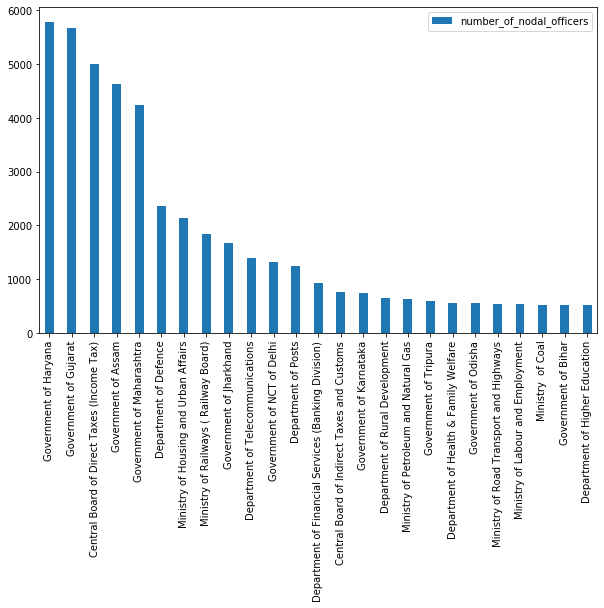

In [111]:
df_1.head(25).plot.bar(x = None,y= None,width=0.4,align='center')

#### Distribution of Nodal Officer Department-wise/Ministry-wise/Government(State/Central) ####
#### The Bar graph shows top 25 Departments having Maximum number of nodal officer####

In [109]:
govt_UP = df[df["Apex Ministry/Dept/State"]=="Government of Uttar Pradesh"]

In [110]:
govt_UP

,Apex Ministry/Dept/State,Parent of Organisation,org_code,org_name,pg_officer_desig,Organisation levels
44811,Government of Uttar Pradesh,Department of Administrative Reforms and Publi...,GOVUP,Government of Uttar Pradesh,Joint Secretary,1.0


In [36]:
govt_MH = df[df["Apex Ministry/Dept/State"]=="Government of Maharashtra"]
govt_MH

,Apex Ministry/Dept/State,Parent of Organisation,org_code,org_name,pg_officer_desig,Organisation levels
38342,Government of Maharashtra,Department of Administrative Reforms and Publi...,GOVMH,Government of Maharashtra,Deputy Secretary.,1.0
38343,Government of Maharashtra,Public Health Department,GOVER,E Governance,Desk Officer,4.0
38344,Government of Maharashtra,Addl CP East Region,GOVPS,Govandi Police Station,Senior Police Inspector,6.0
38345,Government of Maharashtra,Director (E.S. & P.),GRDEN,Executive Engineer Garden Cell,Executive Engineer Garden Cell,5.0
38346,Government of Maharashtra,Add CP South Region,GMPSA,GAMDEVI POLICE STATION,SRINSPECTOR OF POLICE,6.0
38347,Government of Maharashtra,Add Cp South Region,GMPST,Gamdevi police station,Sr.Inspector of Police,5.0
38348,Government of Maharashtra,S.E.&D.S. Medium & Min,GMID1,Godavari Marathwada Irrigation Dev.Carp,Executive Engg.,4.0
38349,Government of Maharashtra,S.E.&D.S. Project 2,GMID2,Godavari Marathwada Irrigation Dev. Corp,Executive Engineer,4.0
38350,Government of Maharashtra,S.E.&D.S. Project 1,GMIDC,GODAVARI MARATHAWADA IRRIGATION DEVELOPMENT COR.,EXECUTIVE ENGINEER,4.0
38351,Government of Maharashtra,General Administration Dept. (Protocol),GMH21,GAD21 EST.,Section Officer,3.0


In [43]:
Delhi =df[df["Apex Ministry/Dept/State"]=='Government of NCT of Delhi']

In [44]:
Delhi

,Apex Ministry/Dept/State,Parent of Organisation,org_code,org_name,pg_officer_desig,Organisation levels
16933,Government of NCT of Delhi,Delhi Subordinate Services Selection Board,ZADMN,Deputy Secretary Administration,DEPUTY SECRETARY ADMIN,4.0
16934,Government of NCT of Delhi,Delhi Subordinate Services Selection Board,ZAOAC,SENIOR ACCOUNTS OFFICER,SENIOR ACCOUNTS OFFICER,4.0
16935,Government of NCT of Delhi,Delhi Subordinate Services Selection Board,ZEXM1,DEPUTY SECRETARY EXAMINATION 1,DEPUTY SECRETARY EXAMINATION 1,4.0
16936,Government of NCT of Delhi,Delhi Subordinate Services Selection Board,ZEXM2,DEPUTY SECRETARY EXAMINATION 2,DEPUTY SECRETARY,4.0
16937,Government of NCT of Delhi,Delhi Subordinate Services Selection Board,ZSEC1,DEPUTY SECRETARY SECRET 1,DEPUTY SECRETARY SECRET 1,4.0
16938,Government of NCT of Delhi,Delhi Subordinate Services Selection Board,ZSEC2,DEPUTY SECRETARY SECRET 2,DEPUTY SECRETARY SECRET 2,4.0
16939,Government of NCT of Delhi,Delhi Subordinate Services Selection Board,ZSSIT,SENIOR SYSTEM ANALYST,SYSTEM ANALYST,4.0
16940,Government of NCT of Delhi,Delhi Subordinate Services Selection Board,ZDRTI,DEPUTY SECRETARY RTI,DEPUTY SECRETARY RTI,4.0
16941,Government of NCT of Delhi,Delhi Subordinate Services Selection Board,ZDSC1,DEPUTY SECRETARY C C 1,DEPUTY SECRETARY C C 1,4.0
16942,Government of NCT of Delhi,Delhi Subordinate Services Selection Board,ZDSC2,DEPUTY SECRETARY C C 2,DEPUTY SECRETARY C C 2,4.0


In [45]:
post =df[df["Apex Ministry/Dept/State"]=='Department of Posts']
post

,Apex Ministry/Dept/State,Parent of Organisation,org_code,org_name,pg_officer_desig,Organisation levels
14812,Department of Posts,Department of Posts,CSIAP,CSI PROJECT,DDG Tech,2.0
14813,Department of Posts,Orissa Postal Circle,CSD12,circle stamp depot,SUPERINTENDENT,3.0
14814,Department of Posts,Postmaster General Kanpur,CSDKP,CSD Kanpur,Superintendent,4.0
14815,Department of Posts,Tamilnadu Postal Circle,CS001,APMG STAFF,APMG Staff Trg &amp; Estt,3.0
14816,Department of Posts,Tamilnadu Postal Circle,CS002,AD vigilance,AD Vigilance,3.0
14817,Department of Posts,Tamilnadu Postal Circle,CS003,AD Admin,AD Admin,3.0
14818,Department of Posts,Tamilnadu Postal Circle,CS004,AD Recruitment,AD Recruitment,3.0
14819,Department of Posts,Tamilnadu Postal Circle,CS005,APMG Mails and Establishment,APMG MAILS,3.0
14820,Department of Posts,Tamilnadu Postal Circle,CS006,APMG BD,APMG BD,3.0
14821,Department of Posts,Tamilnadu Postal Circle,CS007,Postal Life Insurance,DDM PLI,3.0


In [46]:
tele =df[df["Apex Ministry/Dept/State"]=='Department of Telecommunications']
tele

,Apex Ministry/Dept/State,Parent of Organisation,org_code,org_name,pg_officer_desig,Organisation levels
11067,Department of Telecommunications,PGM BGTD,DGTRC,DGMTR,JAO,5.0
11068,Department of Telecommunications,Department of Telecommunications,DGTPF,"Deputy Director General (Finance,Tariff &amp",DDG B&amp;PEF,2.0
11069,Department of Telecommunications,Department of Telecommunications,DGUS2,DDG USOF2,DDGII USOF,2.0
11070,Department of Telecommunications,Department of Telecommunications,DGUS3,DDG USOF3,DDG II USOF,2.0
11071,Department of Telecommunications,Department of Telecommunications,DGUS4,DDG USOF4,DDG SP,2.0
11072,Department of Telecommunications,Department of Telecommunications,DGSRI,DDG Standards RnD Innovation,DDG SRI,2.0
11073,Department of Telecommunications,Department of Telecommunications,DGTEC,Telecommunication Engineering Centre,Director,2.0
11074,Department of Telecommunications,Department of Telecommunications,DGWPF,Sr.Deputy Director General Wireless Planning F...,Deputy Director General WPF,2.0
11075,Department of Telecommunications,MAHARASHTRA TELECOM CIRCLE,DHLGM,DHULE,D.E.,4.0
11076,Department of Telecommunications,Department of Telecommunications,DGPER,Sr. Deputy Director General Personnel Wing DoT,DDG Perssonal Wing,2.0


In [47]:
fin =df[df["Apex Ministry/Dept/State"]=='Department of Financial Services (Banking Division)']
fin

,Apex Ministry/Dept/State,Parent of Organisation,org_code,org_name,pg_officer_desig,Organisation levels
6879,Department of Financial Services (Banking Divi...,Department of Financial Services (Banking Divi...,ACSEC,AC Section Deptt. of Financial Services,Under Secretary,2.0
6880,Department of Financial Services (Banking Divi...,NATIONAL HOUSING BANK,ACHFI,Aptus Value Housing Finance India Limited,VICE PRESIDENT,3.0
6881,Department of Financial Services (Banking Divi...,NATIONAL HOUSING BANK,ACHFL,ALTUM CREDO HOME FINANCE PRIVATE LIMITED,GRO,3.0
6882,Department of Financial Services (Banking Divi...,NATIONAL HOUSING BANK,ABHFL,Aditya Birla Housing Finance Limited,COMPANY SECRETARY,3.0
6883,Department of Financial Services (Banking Divi...,State Bank of Hyderabad,20671,ZO SECUNDERABAD,DEPUTY GENERAL MANAGER,3.0
6884,Department of Financial Services (Banking Divi...,Reserve Bank of India,ABPBL,Aditya Birla Idea Payments Bank Ltd.,Associate Vice President - Bus,3.0
6885,Department of Financial Services (Banking Divi...,State Bank of India,ABU21,AGRI BUSINESS UNIT,Asst General Manager,3.0
6886,Department of Financial Services (Banking Divi...,NATIONAL HOUSING BANK,AFL01,Aavas Financiers Limited,COMPANY SECRETARY,3.0
6887,Department of Financial Services (Banking Divi...,Zonal Office Delhi,AGM1D,"REGIONAL OFFICE-1, DELHI",Asstt. General Manager,4.0
6888,Department of Financial Services (Banking Divi...,Zonal Office Delhi,AGM2D,"REGIONAL OFFICE-II, DELHI",Asstt. General Manager,4.0


In [48]:
rail =df[df["Apex Ministry/Dept/State"]=='Ministry of Railways ( Railway Board)']
rail

,Apex Ministry/Dept/State,Parent of Organisation,org_code,org_name,pg_officer_desig,Organisation levels
49436,Ministry of Railways ( Railway Board),PERSONNEL HQ - NC Railway,PSTLI,Personnel Department Sithouli Workshop,Assistant Personnel Officer,4.0
49437,Ministry of Railways ( Railway Board),Ministry of Railways ( Railway Board),RCFRB,Not in Activation Rail Coach Factory Rai Bareli,DEPUTY GENERAL MANAGER,2.0
49438,Ministry of Railways ( Railway Board),Ministry of Railways ( Railway Board),RCFRL,Rail Coach Factory,General Manager,2.0
49439,Ministry of Railways ( Railway Board),Ministry of Railways ( Railway Board),RCFBL,RAIL COACH FACTORY RAE BARELI,Deputy General Manager G,2.0
49440,Ministry of Railways ( Railway Board),Ministry of Railways ( Railway Board),RCFKP,RCF Kapurthala,Assistant Secretary,2.0
49441,Ministry of Railways ( Railway Board),MECH. PU DIRECTORATE,RCFKX,RAIL COACH FACTORY KAPURTHALA,CHIEF MECHANICAL ENGINEER,3.0
49442,Ministry of Railways ( Railway Board),RAIL COACH FACTORY RAE BARELI,RCFPR,RCF RBL Personnle Department,Dy CPO,3.0
49443,Ministry of Railways ( Railway Board),PERSONNEL HQ - NC Railway,RCALD,Railway Recruitment Board,Chairman RRC,4.0
49444,Ministry of Railways ( Railway Board),Ministry of Railways ( Railway Board),RDASO,Research Design and Standard Organisation,EXECUTIVE DIRECTOR PG,2.0
49445,Ministry of Railways ( Railway Board),APONKJ,RANDM,R and M,Chief OS,6.0


In [50]:
labour =df[df["Apex Ministry/Dept/State"]=='Ministry of Labour and Employment']
labour

,Apex Ministry/Dept/State,Parent of Organisation,org_code,org_name,pg_officer_desig,Organisation levels
48779,Ministry of Labour and Employment,Ministry of Labour and Employment,MO336,Chief Labour Commissioner Central M/o Labour,Joint Secretary,2.0
48780,Ministry of Labour and Employment,ESIC Madhya Pradesh Region,MHNDR,ESIC Hospital Nanda Nagar (Madhya Pradesh),Deputy Director,3.0
48781,Ministry of Labour and Employment,ESIC Uttar Pradesh Region,MHNOI,ESIC Hospital Noida (Uttar Pradesh),Deputy Director,3.0
48782,Ministry of Labour and Employment,ESIC Delhi Region,MHOKH,ESIC Hospital Okhla (Delhi),SAG,3.0
48783,Ministry of Labour and Employment,ESIC Headquarters,MHNAC,ESI MODEL HOSPITAL,Assistant Director,3.0
48784,Ministry of Labour and Employment,ESIC Jharkhand Region,MHNAM,ESIC Hospital Namkum (Jharkhand),Medical Superintendent,3.0
48785,Ministry of Labour and Employment,ESIC Gujarat Region,MHNAR,ESIC Hospital Naroda (Gujarat),Deputy Director,3.0
48786,Ministry of Labour and Employment,ESIC Tamil Nadu Region,MHKKN,ESIC Hospital K K Nagar (Tamil Nadu),Deputy Medical Superintendent,3.0
48787,Ministry of Labour and Employment,ESIC Maharashtra Region,MHKOL,ESIC Hospital Kolhapur (Maharashtra),Medical Superintendent,3.0
48788,Ministry of Labour and Employment,ESIC Delhi Region,MHJHI,ESIC Hospital Jhilmil (Delhi),Deputy Director,3.0


In [51]:
home =df[df["Apex Ministry/Dept/State"]=='Ministry of Home Affairs']
home

,Apex Ministry/Dept/State,Parent of Organisation,org_code,org_name,pg_officer_desig,Organisation levels
45536,Ministry of Home Affairs,Women Safety Division,DFSSD,Directorate of Forensic Sciences Services,Director cum CFS,3.0
45537,Ministry of Home Affairs,PM Division,DOCPW,Directorate of Coordination of Police Wireless,Joint Director Trg,3.0
45538,Ministry of Home Affairs,Ministry of Home Affairs,CORDI,Coordination I,Director,2.0
45539,Ministry of Home Affairs,Police-II Division,CRPFO,Central Reserve police Force,Director General,3.0
45540,Ministry of Home Affairs,Ragistrar General and Census Commissioner of I...,CRSSE,CRS SECC MTSI Language Printing,Deputy Registrar General,3.0
45541,Ministry of Home Affairs,Ministry of Home Affairs,CTCRD,COUNTER TERRORISM AND COUNTER RADICALISATION,JS CTCR,2.0
45542,Ministry of Home Affairs,PM Division,CFSLA,Central Forensic Science Labortory,Director,3.0
45543,Ministry of Home Affairs,Women Safety Division,CFSLD,Central Forensic Science Laboratary,Director CFSL CBI,3.0
45544,Ministry of Home Affairs,Ragistrar General and Census Commissioner of I...,CENSU,Census,Dy Registrar General,3.0
45545,Ministry of Home Affairs,Ministry of Home Affairs,CISDV,CYBER AND INFORMATION SECURITY DIVISION,JS C&amp;IS,2.0


In [52]:
taxes =df[df["Apex Ministry/Dept/State"]=='Central Board of Direct Taxes (Income Tax)']
taxes

,Apex Ministry/Dept/State,Parent of Organisation,org_code,org_name,pg_officer_desig,Organisation levels
82,Central Board of Direct Taxes (Income Tax),Pr. Chief Commissioner of Income Tax (CCA) (Bi...,CBHAG,Pr. Commissioner of Income Tax Bhagalpur,Pr.CIT Bhagalpur,3.0
83,Central Board of Direct Taxes (Income Tax),Central Board of Direct Taxes (Income Tax),CBDLI,Pr. Chief Commissioner of Income Tax Delhi-I,Pr.CCIT,2.0
84,Central Board of Direct Taxes (Income Tax),Central Board of Direct Taxes (Income Tax),CBDPA,Pr. Chief Commissioner of Income Tax (CCA) (Bi...,Pr CCIT Bihar and Jharkhand,2.0
85,Central Board of Direct Taxes (Income Tax),Central Board of Direct Taxes (Income Tax),CBDSU,CHIEF COMMISSIONER OF INCOME TAX SURAT,CCIT,2.0
86,Central Board of Direct Taxes (Income Tax),CIT EXEMPTIONS JAIPUR,CBDT1,income tax E Range Jaipur,JCIT,4.0
87,Central Board of Direct Taxes (Income Tax),Central Board of Direct Taxes (Income Tax),CBDJO,CHIEF COMMISSIONER OF INCOME TAX JODHPUR,CCIT,2.0
88,Central Board of Direct Taxes (Income Tax),Income Tax Deptt.,CBDTD,CIR61,DCIT Cir 6 1,5.0
89,Central Board of Direct Taxes (Income Tax),CHIEF COMMISSIONER OF INCOME TAX BANGALORE,CBEN1,"Commissioner of Income Tax, Bangalore-I",Pr.Commissioner of Income Tax1,3.0
90,Central Board of Direct Taxes (Income Tax),CHIEF COMMISSIONER OF INCOME TAX BANGALORE,CBEN2,"Commissioner of Income Tax, Bangalore-II",Pr.Commissioner of Income Tax2,3.0
91,Central Board of Direct Taxes (Income Tax),CHIEF COMMISSIONER OF INCOME TAX BANGALORE,CBEN3,"Commissioner of Income Tax, Bangalore-III",Pr.Commissioner of Income Tax,3.0
